## Modelling

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import streamlit as st
import pickle

In [2]:
# Reading the CSV file
data = pd.read_csv('new_data.csv')
# Sample data
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,CHANGE_AMT1,CHANGE_AMT2,CHANGE_AMT3,CHANGE_AMT4,CHANGE_AMT5
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,1,-811.0,-2413.0,-689.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,0.0,2000.0,1,-957.0,957.0,590.0,183.0,-194.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,-15212.0,-468.0,772.0,617.0,601.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,1243.0,1058.0,-20977.0,645.0,588.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,10000.0,9000.0,689.0,679.0,0,-2947.0,30165.0,-14895.0,-1794.0,-15.0


In [3]:
#Dividng the classes
data_minor = data[data['default']==1]
data_major = data[data['default']==0]

In [4]:
#Resampling to balance the data
downsample = resample(data_major , replace=False , n_samples=7000 , random_state=42)
upsample = resample(data_minor , n_samples=7000 , random_state=42)

In [5]:
#Concating the resampled classes to create new balanced dataset
newdata = pd.concat([upsample ,downsample])
newdata.shape

(14000, 23)

In [6]:
#Seperating features and target variable
X = newdata.drop('default', axis=1)
Y = newdata['default']

In [7]:
# Train test split of 80-20
X_train , X_test , Y_train, Y_test = train_test_split(X , Y ,test_size=0.2,random_state=42)

## Logistic Regression

In [8]:
# Using StandarScalar() to ensure all the features are on same scale
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Fit the model to the scaled training data
log_reg_model.fit(X_train, Y_train)

# Predict on the scaled testing data
Y_pred = log_reg_model.predict(X_test)

#Print Accuracy
print('Accuracy:', accuracy_score(Y_pred,Y_test))
# Print classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 0.6821428571428572
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1385
           1       0.70      0.66      0.68      1415

    accuracy                           0.68      2800
   macro avg       0.68      0.68      0.68      2800
weighted avg       0.68      0.68      0.68      2800

Confusion Matrix:
[[980 405]
 [485 930]]


## Decision Tree

In [10]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the model to the scaled training data
dt_model.fit(X_train, Y_train)

# Predict on the scaled testing data
Y_pred_dt = dt_model.predict(X_test)

# Print accuracy
print('Decision Tree Accuracy:', accuracy_score(Y_test, Y_pred_dt))

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(Y_test, Y_pred_dt))

# Print confusion matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_dt))

Decision Tree Accuracy: 0.7589285714285714
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1385
           1       0.73      0.82      0.78      1415

    accuracy                           0.76      2800
   macro avg       0.76      0.76      0.76      2800
weighted avg       0.76      0.76      0.76      2800

Decision Tree Confusion Matrix:
[[ 958  427]
 [ 248 1167]]


## XGBOOST

In [11]:
xgb_model = xgb.XGBClassifier()

# Fit the model on training data
xgb_model.fit(X_train, Y_train)

# Predict on the test data
Y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_xgb)
print("Accuracy:", accuracy)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(Y_test, Y_pred_xgb))

# Print confusion matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb))

Accuracy: 0.7860714285714285
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1385
           1       0.78      0.81      0.79      1415

    accuracy                           0.79      2800
   macro avg       0.79      0.79      0.79      2800
weighted avg       0.79      0.79      0.79      2800

Decision Tree Confusion Matrix:
[[1060  325]
 [ 274 1141]]


## Random Forest Classifier

In [12]:
Random = RandomForestClassifier()

# Fit the model to the scaled training data
Random.fit(X_train, Y_train)

# Predict on the scaled testing data
Y_pred_ran = Random.predict(X_test)

# Print accuracy
print('Decision Tree Accuracy:', accuracy_score(Y_test, Y_pred_ran))

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(Y_test, Y_pred_ran))

# Print confusion matrix
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_ran))

Decision Tree Accuracy: 0.8307142857142857
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1385
           1       0.84      0.83      0.83      1415

    accuracy                           0.83      2800
   macro avg       0.83      0.83      0.83      2800
weighted avg       0.83      0.83      0.83      2800

Decision Tree Confusion Matrix:
[[1154  231]
 [ 243 1172]]


In [13]:
print('Train Accuracy:', accuracy_score(Y_train, Random.predict(X_train)))
print('Test Accuracy:', accuracy_score(Y_test, Random.predict(X_test)))

Train Accuracy: 0.9997321428571428
Test Accuracy: 0.8307142857142857


* Random forest classifer results in most accurate model compared to others models tested above
* But while looking at the Train and Test accuracy, we observe that the model tends to overfit
* We can perform hyperparameter tuning with cross validation to reduce overfitting

In [14]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, cv = 5, n_jobs = -1)

rf_cv.fit(X_train, Y_train)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 250, 'max_features': 7, 'max_depth': 8, 'criterion': 'entropy'}


Accuracy: 0.725

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1385
           1       0.77      0.65      0.70      1415

    accuracy                           0.73      2800
   macro avg       0.73      0.73      0.72      2800
weighted avg       0.73      0.72      0.72      2800




Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

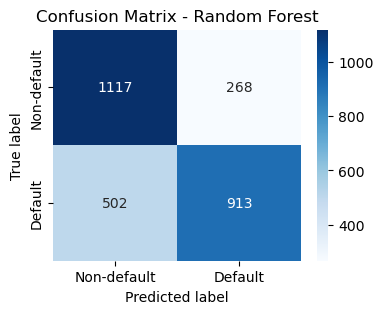

In [15]:
Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 7, n_estimators= 250)
Ran.fit(X_train, Y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,Y_test))

print()
print(classification_report(Y_test, y_pred))
print()

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

In [16]:
scores = cross_val_score(Ran, X_train, Y_train, cv=5, scoring=make_scorer(accuracy_score))
scores

array([0.72946429, 0.72946429, 0.71785714, 0.72410714, 0.70625   ])

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
}

In [17]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Setup the grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                   # Number of folds in cross-validation
    scoring='accuracy',
    n_jobs = -1
)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [19]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Accuracy: 0.7425

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1385
           1       0.79      0.67      0.73      1415

    accuracy                           0.74      2800
   macro avg       0.75      0.74      0.74      2800
weighted avg       0.75      0.74      0.74      2800




Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

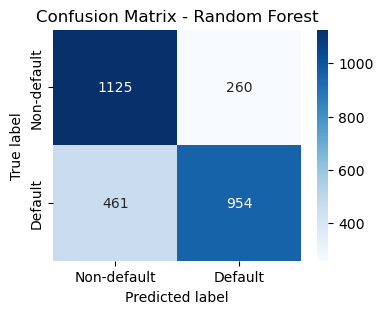

In [27]:
# Final model after experimenting with the parameters
Ran = RandomForestClassifier(max_depth= 10, min_samples_leaf = 4, min_samples_split = 6, n_estimators= 300)
Ran.fit(X_train, Y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,Y_test))

print()
print(classification_report(Y_test, y_pred))
print()

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

In [28]:
# Print accuracy
print('Train Accuracy:', accuracy_score(Y_train, Ran.predict(X_train)))
print('Test Accuracy:', accuracy_score(Y_test, Ran.predict(X_test)))

Train Accuracy: 0.7932142857142858
Test Accuracy: 0.7425


## Saving the Model

In [29]:
# Saving the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
# Saving the RandomForest model
with open('model.pkl', 'wb') as f:
    pickle.dump(Ran, f)